#library for data handling,plotting and deep learning


In [1]:
import numpy as np 
import pandas as pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
#from tensorflow.keras.optimizers import Adam

import tensorflow as tf 

from sklearn.metrics import confusion_matrix,classification_report
import librosa
#from tensorflow import keras
#from tensorflow.keras.models import Sequential
import os


In [2]:
def load_and_preprocess_data(audio_path, label):
   #load hte audio fiel and set sample ratesto None to keep it original
   audio,sr = librosa.load(audio_path,sr=None)

   #extraxt MFCC (Mel-Frequency cepstral coefficients) feature
   mfccs = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13)
   #Transpose MFCC to them correctly for model input
   return mfccs.T,label
   
#Function to prepare dataset from real and fake audio file paths

def prepare_dataset(real_paths, fake_paths):
   X, y = [], [] # will hold features, y will hold labels (e for real, 1 for fake)
   #Load real audio files and label then as e (real)
   for path in real_paths:
     features, label = load_and_preprocess_data(path, 0)
     X.append(features)
     y.append(label)
    #Load fake audio files and label them as 1 (fake)
   for path in fake_paths:
     features, label = load_and_preprocess_data(path, 1)
     X.append(features)
     y.append(label)

   return X, np.array(y)   


    

In [3]:
#function to apply data augumentation
def augument_data (X,y) :
    augumented_X, augumented_y =[],[]

    #Loop through each feature set and lavel
    for features,label in zip(X,y):
        augumented_X.append(features) #origianl featues
        augumented_y.append(label) #Original label
        #time streching (simulate by adjusting audio speed before extraxting the features)
        audio_signal =librosa.effects.time_stretch(features.T[0],rate=0.8)
        augumented_X.append(librosa.feature.mfcc(y =audio_signal,sr =22050, n_mfcc=13).T)
        augumented_y.append(label)

        #Pitch shifting (change pitch slightly for diversity in data)
        audio_signal_shifted = librosa.effects.pitch_shift(features.T[0],sr=22050,n_steps=2)
        augumented_X.append(librosa.feature.mfcc(y=audio_signal_shifted,sr=22050,n_mfcc=13).T)
        augumented_y.append(label)

    #Returning augumented features and label
    return augumented_X , np.array(augumented_y)


In [4]:
#An LSTH, or Long Short-Term Memory network, is a special type of neural network that's great for handling sequences of data, like text, speech, or time-series-date. Imagine it as a smart memory system that remembers important information from the past and forgets unimportant details
#Here's a simple breakdown:
# Memory Cells: LSTH networks have "memory cells that can hold information over long time periods. Each cell decides what to remember, what to forget, and what new information to add, using special
#structures called "gates."
#Gates: There are three main gates:
#Forget Gate: Decides what past information to forget.
#Input Gate: Chooses which new information to store.
#Output Gate: Decides what information to send to the next step.
#Learning from Sequences: These gates allow LSTMs to selectively remember or forget information as they process each step of the sequence, making them useful for things like language translation,
#predicting stock prices, or detecting anomalies in sensor data.


In [5]:
import keras


def create_model(input_shape):
   model =tf.keras.models.Sequential([
       tf.keras.Input (shape=input_shape),
       tf.keras.layers.Masking(mask_value=0.0),
       tf.keras.layers.LSTM (64, return_sequences=True),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.LSTM(32),
       tf.keras.layers.Dropout (0.2),
       tf.keras.layers.Dense (16, activation= 'relu'),
       tf.keras.layers.Dense (2, activation='softmax')
   ])
   
   model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss ='categorical_crossentropy',
                 metrics = ['accuracy'])
                
   
   return model

In [6]:
#fucntion to train and evaliate the model
def train_and_evaluate(model ,X_train, y_train,X_test,y_test,epochs =50 ,batch_size =32) :
    # Train hte model nd store the trainding history ofr plotting
    history = model.fit(X_train,y_train ,epochs=epochs,batch_size=batch_size ,validation_split =.2,verbose =1)
    #Evaluate the model on the test data and prinyinh the accuraay
    test_loss,test_acc = model.evaluate(X_test,y_test,verbose =0)
    print(f"Test accuracy:{test_acc:.4f}")
    #Return the trainding history
    return history

In [7]:
# Function to visualise hte trianng and validatiton accuracy an loss
def plot_training_history (history) :
    plt.figure(figsize=(12,4))
    
    #Plt accuracy ver epochs
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'],label ='Training accuracy')
    plt.plot(history.history['val_accuracy'],label ='Validation accuracy')
    plt.title("Model Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuaracy')
    plt.legend()
    #Plting tle loss ver eposch
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'],label ='Training Loss')
    plt.plot(history.history['val_loss'],label ='Validation Loss')
    plt.title("Model Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    




In [8]:
def plot_confusion_matrix(y_true,y_pred):
    cm = confusion_matrix(y_true.argmax(axis =1),y_pred.argmax(axis =1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

In [9]:
base_path =r"C:\Users\rajku\Downloads\archive (1)\for-rerec\for-rerecorded\training"

In [10]:
real_paths = [os.path.join(base_path,'Real',f) for f in os.listdir(os.path.join(base_path,"Real")) if f.endswith('.wav')]
fake_paths = [os.path.join(base_path,'Fake',f) for f in os.listdir(os.path.join(base_path,'Fake')) if f.endswith('.wav')]

#Prepare and augment the dataset
X,y = prepare_dataset (real_paths,fake_paths)

C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=57
  warnings.warn(
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=71
  warnings.warn(
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=61
  warnings.warn(
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=76
  warnings.warn(
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=63
  warnings.warn(
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is t

Epoch 1/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.6458 - loss: 0.6173 - val_accuracy: 0.7341 - val_loss: 0.5196
Epoch 2/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 45s 74ms/step - accuracy: 0.7300 - loss: 0.5263 - val_accuracy: 0.7541 - val_loss: 0.4799
Epoch 3/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.7465 - loss: 0.4948 - val_accuracy: 0.7506 - val_loss: 0.4857
Epoch 4/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7521 - loss: 0.4759 - val_accuracy: 0.7524 - val_loss: 0.4979
Epoch 5/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7551 - loss: 0.4770 - val_accuracy: 0.7557 - val_loss: 0.4707
Epoch 6/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7556 - loss: 0.4638 - val_accuracy: 0.7557 - val_loss: 0.4835
Epoch 7/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.7610 - loss: 0.4556 - val_accuracy: 0.7535 - val_loss: 0.4546
Epoch 8/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7697 - loss: 0.4465 - 

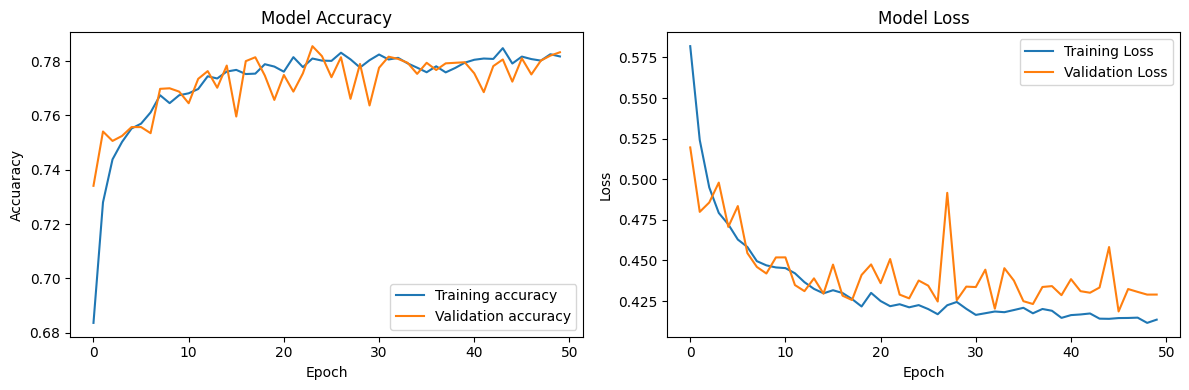

192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


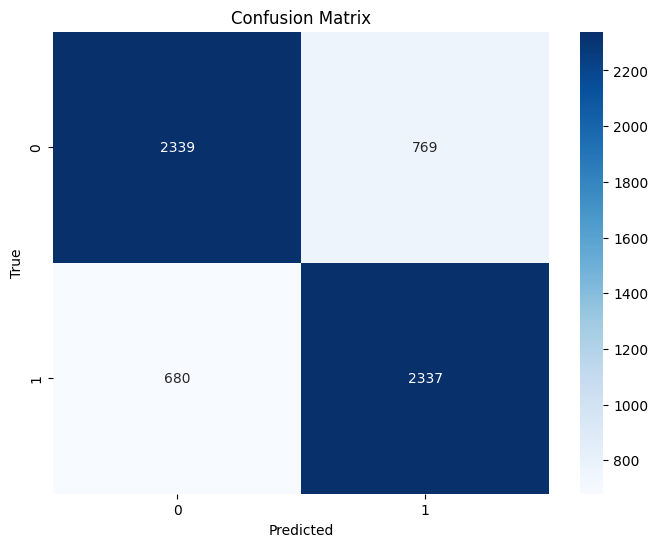

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3108
           1       0.75      0.77      0.76      3017

    accuracy                           0.76      6125
   macro avg       0.76      0.76      0.76      6125
weighted avg       0.76      0.76      0.76      6125

No of real audio samples:5104
No of fake audio samples:5104
Total no of audio samples:10208
No of fake audio samples:5104
Maximum sequence length:78
Shape of X_treain:(24499, 78, 13)
Shape of Xtst:3


In [11]:
X,y = prepare_dataset(real_paths,fake_paths)
X_augumented, y_augumented =augument_data(X,y)

# pad sequencs
max_length = max(len(seq) for seq in X_augumented)
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_augumented,maxlen = max_length,dtype= 'float32',padding = 'post',truncating ='post')


#Split the data
X_train ,X_test ,y_train,y_test = train_test_split(X_padded,y_augumented,test_size=.2,random_state=42)

# convtert hte labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
#Create and train the model
model = create_model(input_shape=(X_train.shape[1],X_train.shape[2]))
history = train_and_evaluate(model,X_train,y_train,X_test,y_test)

#Visualise the results
plot_training_history(history)
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

# Optional dataset statics
print(f'No of real audio samples:{len(real_paths)}')
print(f'No of fake audio samples:{len(fake_paths)}')
print(f'Total no of audio samples:{len(fake_paths)+len(real_paths)}')
print(f'No of fake audio samples:{len(fake_paths)}')
print(f'Maximum sequence length:{max_length}')
print(f'Shape of X_treain:{X_train.shape}')
print(f'Shape of Xtst:{len(X_test.shape)}')




In [12]:
def preprocess_audio(audio_path, max_length):
    #load the audio
    audio ,sr =librosa.load(audio_path,sr=None)

    # Extraxrt MFCC features (use samme parameters as in training)
    mfccs = librosa.feature.mfcc(y= audio, sr=sr,n_mfcc=13)

    #Transpose the MFCC TO match the input format
    mfccs= mfccs.T

    #pad the sequences to the max length used during training 
    padded_mfccs = tf.keras.preprocessing.sequence.pad_sequences([mfccs],maxlen=max_length,dtype='float32',padding='post',truncating='post')

    return padded_mfccs

In [31]:
test_audio_paths =[r"C:\Users\rajku\OneDrive\Documents\Modi_Meloniai_voice_changer#narendermodi_#ai_#voice#ai__#voice__#changer__#treanding__#haryanvi(128k).m4a",r"C:\Users\rajku\Downloads\archive (1)\for-2sec\for-2seconds\testing\fake\file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"]
#test_audio_paths =["for-2sec\for-2seconds\testing\fake\file16.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",'for-2sec\for-2seconds\testing\real\file3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav']
#test_audio_paths =r"C:\Users\rajku\Downloads\archive (1)\for-rerec\for-rerecorded\testing\fake\recording13014.wav_norm_mono.wav"
#test_audio_paths =[ r"C:\Users\rajku\OneDrive\Documents\Sound recordings\Recording.m4a",r"C:\Users\rajku\Downloads\archive (1)\for-2sec\for-2seconds\testing\fake\file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"]

for audio_path in test_audio_paths:
    padded_sample = preprocess_audio(audio_path,max_length=X_train.shape[1])
    prediction = model.predict(padded_sample)
    predicted_class = np.argmax(prediction,axis=1)[0]
    if predicted_class ==1:
        print(f"{audio_path}:Fake ")

    else:
        print(f"{audio_path}: Real")


C:\Users\rajku\AppData\Local\Temp\ipykernel_6088\2124815322.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio ,sr =librosa.load(audio_path,sr=None)
C:\Users\rajku\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

In [14]:
model.save('lstm_model.h5')

In [15]:
new_model = tf.keras.models.load_model('lstm_model.h5')


In [32]:
#padded_sample = preprocess_audio(audio_path,max_length=X_train.shape[1])
prediction = new_model.predict(padded_sample)
predicted_class = np.argmax(prediction,axis=1)[0]
if predicted_class ==1:
        print(f"{audio_path}:Fake ")

else:
        print(f"{audio_path}: Real")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
C:\Users\rajku\OneDrive\Documents\Modi_Meloniai_voice_changer#narendermodi_#ai_#voice#ai__#voice__#changer__#treanding__#haryanvi(128k).m4a:Fake 
